In [1]:
!pip install wquantiles

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # visulization libaray
import seaborn as sns  # visualization libaray
from scipy.stats import trim_mean
import wquantiles # for calculating the weighted quantiles 
from statsmodels import robust # for calculating the mean absolute deviation


In [3]:
state=pd.read_csv("state.csv")
state

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


### Location Estimates of Population and Murder Rates

In [4]:
# Compute the mean, trimmed mean, and median for the population

print(state['Population'].mean())

# trimmed mean
print(trim_mean(state['Population'], 0.1)) # 0.1 drops 10% from each end 

print(state['Population'].median())

6162876.3
4783697.125
4436369.5


In [5]:
#  Weighted mean 

np.average(state["Murder.Rate"],weights=state["Population"])


4.445833981123393

In [6]:
# Weighted Median 

wquantiles.median(state["Murder.Rate"],weights=state["Population"])

4.4

Weighgted mean and Median are same for this case

## Estimates of Variability 
- also referred to as dispersion, measures whether the data values are tightly clus‐
tered or spread out

In [7]:
# Standard deviation 

state["Population"].std()

6848235.347401142

In [8]:
# IQR (75th quantile - 25th quantile)

state["Population"].quantile(0.75)-state["Population"].quantile(0.25)

4847308.0

In [9]:
# Robust Median Absolute deviation 

robust.scale.mad(state["Population"])

3849876.1459979336

The standard deviation is almost twice as large as the MAD

## Exploring The Data Distribution

### Percentiles and Boxplots

In [10]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

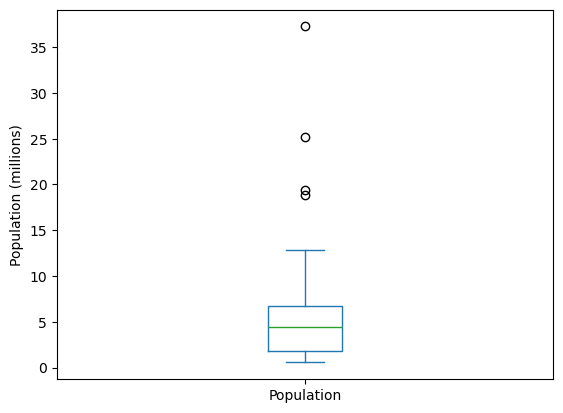

In [11]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

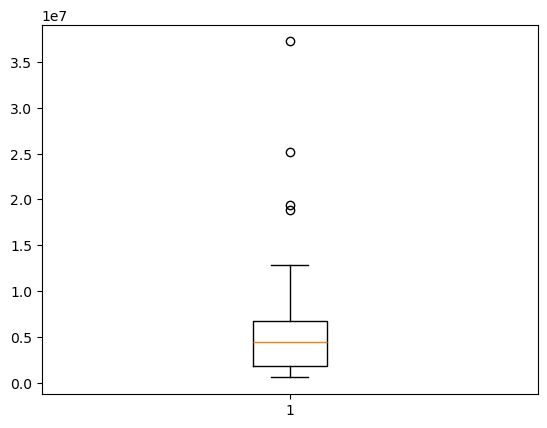

In [12]:
plt.boxplot(state['Population'])
plt.show()

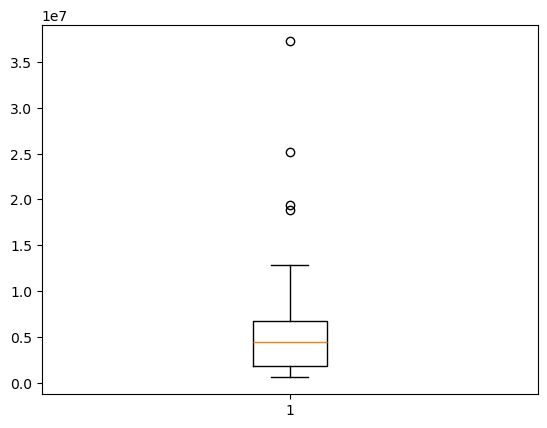

In [13]:
X=state['Population']

plt.boxplot(X)
plt.show()

### Frequency Tables and Histograms 

- The function pandas.cut creates a series that maps the values into the segments.
- Using the method value_counts, we get the frequency table

In [14]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation

0       (4232659.0, 7901692.0]
1       (526935.67, 4232659.0]
2       (4232659.0, 7901692.0]
3       (526935.67, 4232659.0]
4     (33584923.0, 37253956.0]
5       (4232659.0, 7901692.0]
6       (526935.67, 4232659.0]
7       (526935.67, 4232659.0]
8     (15239758.0, 18908791.0]
9      (7901692.0, 11570725.0]
10      (526935.67, 4232659.0]
11      (526935.67, 4232659.0]
12    (11570725.0, 15239758.0]
13      (4232659.0, 7901692.0]
14      (526935.67, 4232659.0]
15      (526935.67, 4232659.0]
16      (4232659.0, 7901692.0]
17      (4232659.0, 7901692.0]
18      (526935.67, 4232659.0]
19      (4232659.0, 7901692.0]
20      (4232659.0, 7901692.0]
21     (7901692.0, 11570725.0]
22      (4232659.0, 7901692.0]
23      (526935.67, 4232659.0]
24      (4232659.0, 7901692.0]
25      (526935.67, 4232659.0]
26      (526935.67, 4232659.0]
27      (526935.67, 4232659.0]
28      (526935.67, 4232659.0]
29     (7901692.0, 11570725.0]
30      (526935.67, 4232659.0]
31    (18908791.0, 22577824.0]
32     (

In [15]:
# Frequency Table 

binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

#### How frequency is decided
-  The least populous state is Wyoming, with 563,626 people, and the most populous is
California, with 37,253,956 people. This gives us a range of 37,253,956 – 563,626 =
36,690,330, which we must divide up into equal size bins—let’s say 10 bins. With 10
equal size bins, each bin will have a width of 3,669,033, so the first bin will span from
563,626 to 4,232,658

- It is important to include the empty bins; the fact that there are no values
in those bins is useful information. It can also be useful to experiment with different
bin sizes. If they are too large, important features of the distribution can be obscured.
If they are too small, the result is too granular, and the ability to see the bigger picture
is lost

Text(0.5, 0, 'Population (millions)')

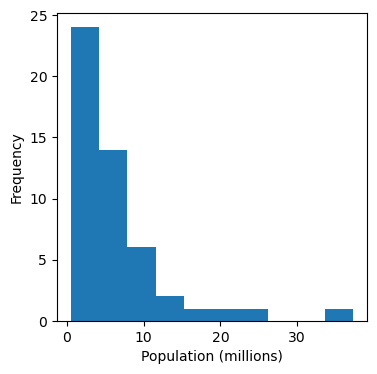

In [24]:
ax=(state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')

#### Density Plots and Estimates 

- Kernal desity estimate

Text(0.5, 0, 'Murder Rate (per 100,000)')

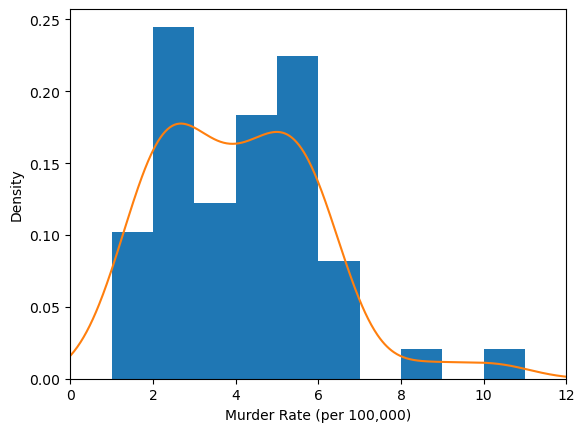

In [17]:
 ax=state['Murder.Rate'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax) # ax=ax will cause the plot to be added to the same graph 
ax.set_xlabel('Murder Rate (per 100,000)')

Total area under the curve is 1

 ## Exploring Binary and Categorical Data 

In [18]:
dfw=pd.read_csv('dfw_airline.csv')

 ### Bar Chart

Text(0, 0.5, 'Count')

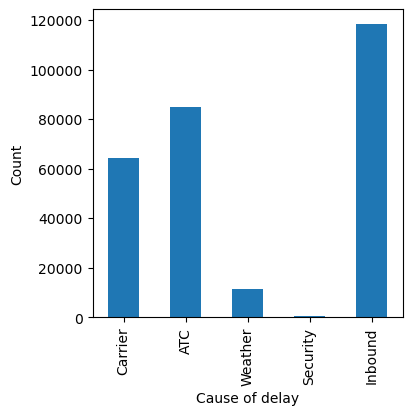

In [19]:
ax=dfw.transpose().plot.bar(figsize=(4,4),legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

### Correlaion , Heat Map 


In [8]:
sp500_px=pd.read_csv('sp500_data.csv',index_col=0)
sp500_sym=pd.read_csv('sp500_sectors.csv')

sp500_sym.head()
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


<Axes: >

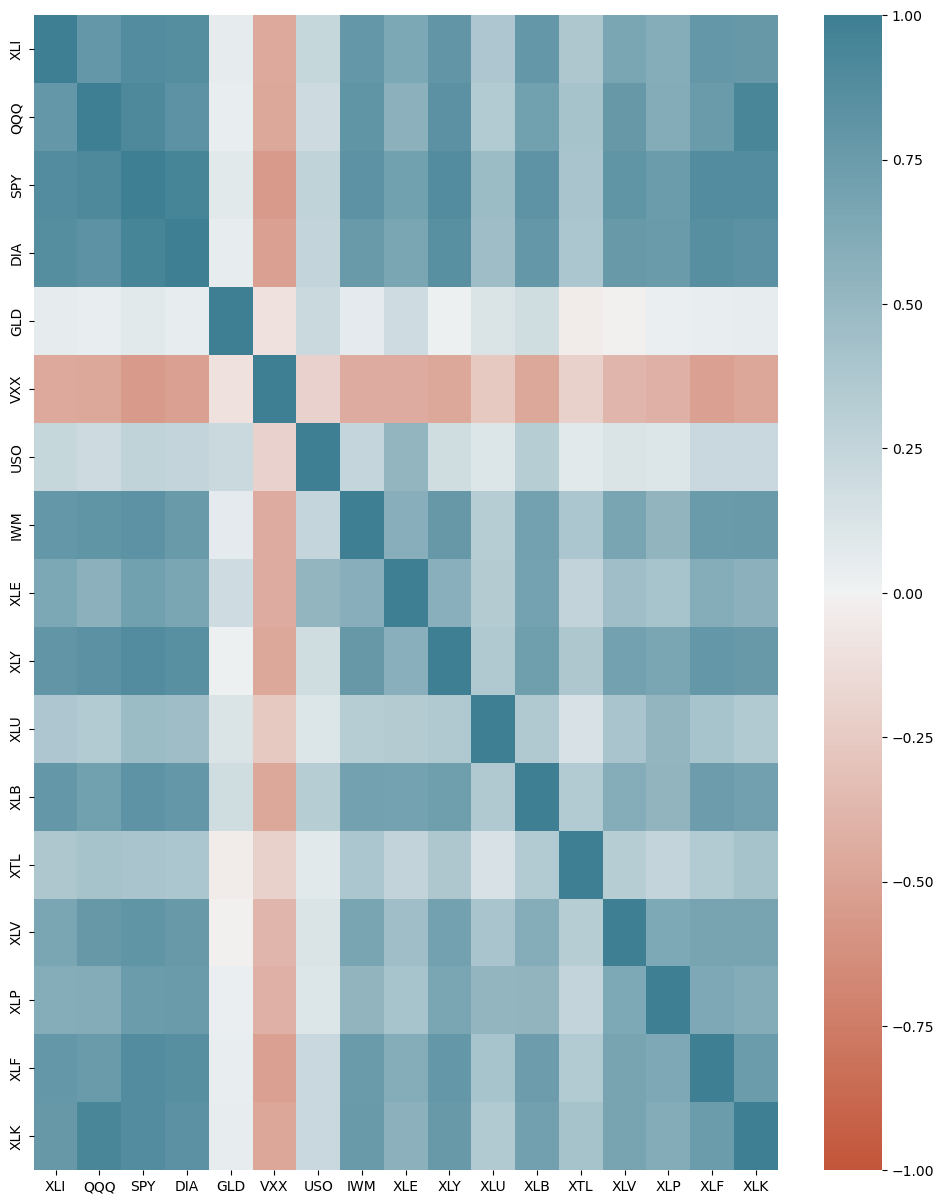

In [5]:
# Heat map

etfs=sp500_px.loc[sp500_px.index>'2012-07-01',
                  sp500_sym[sp500_sym['sector']=='etf']['symbol']]

plt.figure(figsize=(12,15))
sns.heatmap(etfs.corr(),vmin=-1,vmax=1,
            cmap=sns.diverging_palette(20,220,as_cmap=True))


### Scatterplots

In [6]:
ax=telecom.plot.scatter(x='T',y='VZ',figsize=(4,4),marker='$\u25EF$')
ax=set_xlabel('ATT (T)')
ax.set_ylabel('Verizon(VZ)')
ax.axhline(0,cplor='grey',lw=1)
ax.axvline(0,color='grey',lw=1)

NameError: name 'telecom' is not defined

## Exploring Two or More Variables 

### Hexagonal Binning and countours 

- (Plotting Numeric Versus NUmeric Data)

In [11]:
kc_tax=pd.read_csv('kc_tax.csv')
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [13]:
# Filtering the data set 

kc_tax0=kc_tax.loc[(kc_tax.TaxAssessedValue<750000)&
                      (kc_tax.SqFtTotLiving>100) &
                      (kc_tax.SqFtTotLiving<3500),:]

kc_tax0.shape


(432693, 3)

In [ ]:
# Hexagonal Binning 

ax=kc